### Projeto de Análise de Dados com Python e Pandas

Utilizando uma base de dados que mostra os índices de educação dos países no mundo, fiz um recorte com os anos de 2002 à 2016 (Último ano com amostra coletada), para exibir um comparativo entre os países através de gráficos.

1 passo: Tratamento dos dados.
2 passo: Filtragem e recorte (3 países por continente e com os dados no período previamente escolhido)
3 passo: Criação de gráfico para fins de comparação.

Foi feito primeiro a análise por países em um mesmo continente e depois foi comparado a média entre todos os países.

Fonte de dados:http://gapm.io/deducation_idx

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv(r"C:\Users\julio\Documents\Ciência de Dados DIO\owid_education_idx.csv", sep=",")

df

,country,1869,1870,1871,1872,1873,1874,1875,1876,1877,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.07,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,20.00,20.70,21.30,22.00,22.70,23.30,23.30,24.00,24.00,25.30
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.70,31.30,31.30,31.30,32.00,32.70,32.70,33.30,34.00,34.00
2,Albania,0.13,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN,...,61.30,62.00,62.00,62.00,64.00,64.70,64.70,64.70,66.70,66.70
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.30,67.30,67.30,68.00,68.00,68.00,68.00,68.00,68.00,68.00
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.00,64.70,66.00,66.70,68.00,68.70,70.00,70.70,72.00,72.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.30,66.00,66.70,68.00,68.00,68.70,68.70,68.70,68.70,68.70
185,Yemen,0.07,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,15.30,16.70,17.30,18.70,20.00,20.00,20.00,20.00,20.00,20.00
186,South Africa,3.47,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,...,64.70,67.30,66.70,66.00,65.30,66.00,66.70,67.30,67.30,67.30
187,Zambia,0.07,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,43.30,43.30,44.00,44.70,44.70,45.30,46.00,46.00,46.70,46.70


In [309]:
df = df[['country','2002','2003','2004','2005','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']]
array = ['United States','France', 'Brazil', 'China','Russia','India', 'Egypt', 'Canada', 'Germany', 'New Zealand', 'South Africa', 'Australia', 'Chile', 'Japan', 'Argentina','Indonesia','Nigeria', 'Mexico', 'Cuba', 'Costa Rica', 'Panama']
df=df.loc[df['country'].isin(array)]

df = df.set_index('country')
df = df.transpose(copy= False) 
df

country,Argentina,Australia,Brazil,Canada,Chile,China,Costa Rica,Cuba,Germany,Egypt,...,Indonesia,India,Japan,Mexico,Nigeria,New Zealand,Panama,Russia,United States,South Africa
2002,62.00,78.70,41.30,78.00,62.70,44.70,52.70,65.30,83.30,35.30,...,48.00,31.30,73.30,47.30,34.70,77.30,58.70,76.00,85.30,58.70
2003,61.30,78.70,41.30,80.00,64.00,45.30,52.70,65.30,86.00,36.00,...,48.70,31.30,74.00,49.30,34.70,77.30,59.30,76.00,85.30,58.70
2004,60.70,78.00,42.00,81.30,63.30,46.00,52.70,66.00,88.70,37.30,...,49.30,32.00,74.70,50.70,34.70,78.00,60.00,76.00,85.30,59.30
2005,60.00,79.30,42.70,82.00,63.30,46.00,52.70,67.30,90.70,38.70,...,52.70,32.70,74.70,53.30,34.70,78.00,60.70,76.00,85.30,60.00
2007,59.30,82.00,44.70,82.70,66.00,46.70,56.00,70.70,91.30,41.30,...,47.30,34.70,76.00,53.30,34.70,78.70,61.30,76.00,88.00,64.70
2008,62.00,82.00,45.30,83.30,66.00,47.30,56.00,72.00,92.00,42.70,...,49.30,35.30,76.00,54.70,34.70,79.30,62.00,76.70,88.00,67.30
2009,65.30,82.70,46.00,84.00,65.30,48.70,55.30,73.30,92.00,43.30,...,49.30,36.00,76.70,53.30,34.70,80.00,62.00,76.70,88.00,66.70
2010,65.30,83.30,47.30,84.70,65.30,49.30,56.00,75.30,92.70,44.70,...,50.70,36.00,78.70,56.00,36.70,80.00,62.00,77.30,88.70,66.00
2011,65.30,84.00,48.70,85.30,66.00,50.00,56.70,72.00,93.30,45.30,...,50.70,37.30,80.00,57.30,38.00,80.70,63.30,78.00,88.70,65.30
2012,65.30,84.00,49.30,86.00,66.00,50.00,56.70,73.30,93.30,46.00,...,52.00,38.70,81.30,56.00,39.30,80.70,64.70,78.70,88.00,66.00


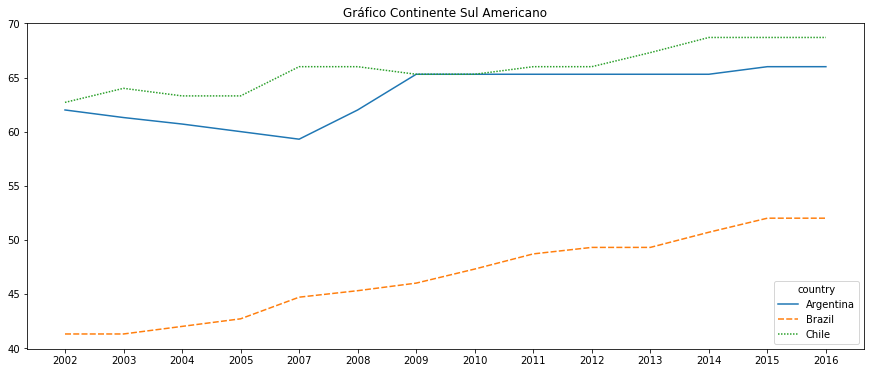

In [307]:
DataSA = df[['Argentina', 'Brazil', 'Chile']]
DataNA = df[['Canada', 'United States', 'Mexico']]
DataAF = df[['South Africa', 'Egypt','Nigeria']]
DataAS = df[['China', 'India', 'Japan']]
DataEU = df[['France','Germany','Russia']]
DataOC = df[['New Zealand', 'Australia', 'Indonesia']]
DataAC = df[['Cuba','Costa Rica','Panama']]

# Gráfico Continente Sul Americano

plt.figure(figsize=(15,6))
sns.lineplot(data=DataSA).set(title="Gráfico Continente Sul Americano")
plt.show()

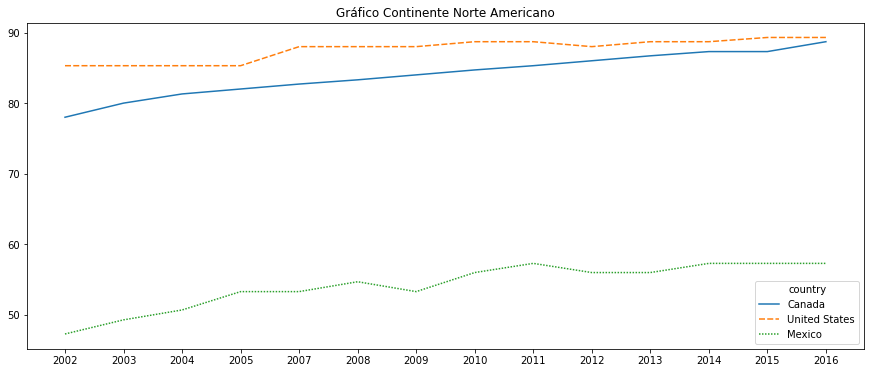

In [306]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DataNA).set(title="Gráfico Continente Norte Americano")
plt.show()

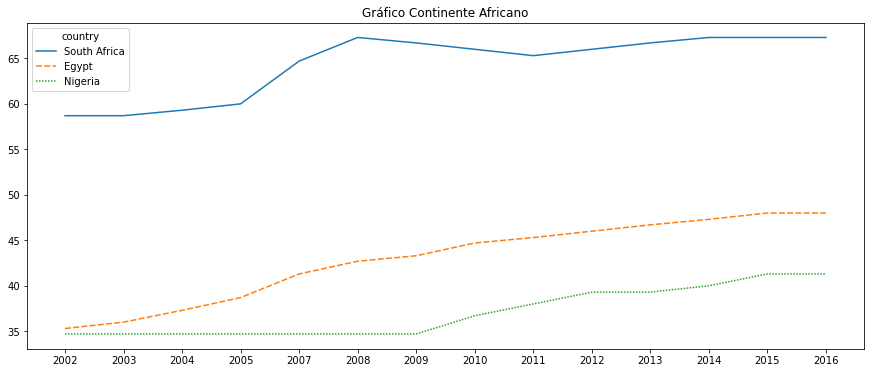

In [305]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DataAF).set(title="Gráfico Continente Africano")
plt.show()

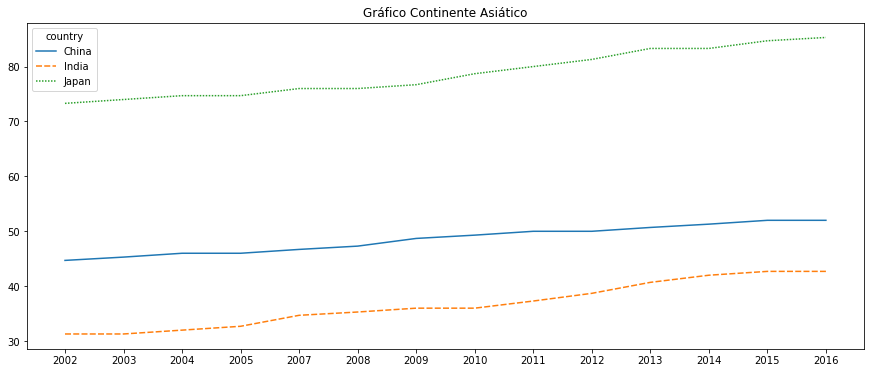

In [304]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DataAS).set(title="Gráfico Continente Asiático")
plt.show()

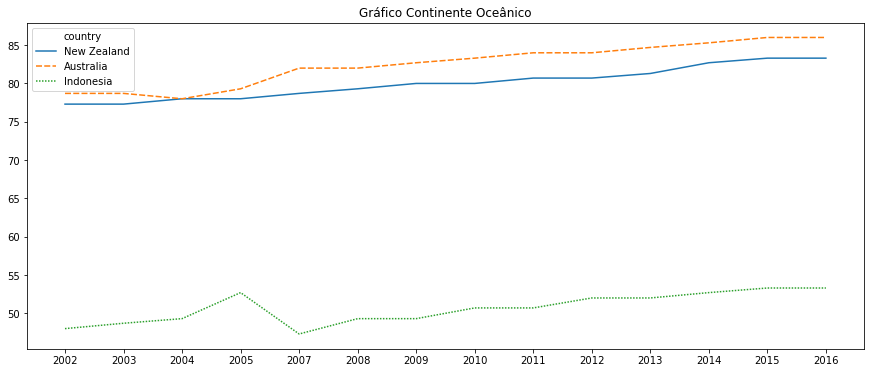

In [303]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DataOC).set(title="Gráfico Continente Oceânico")
plt.show()

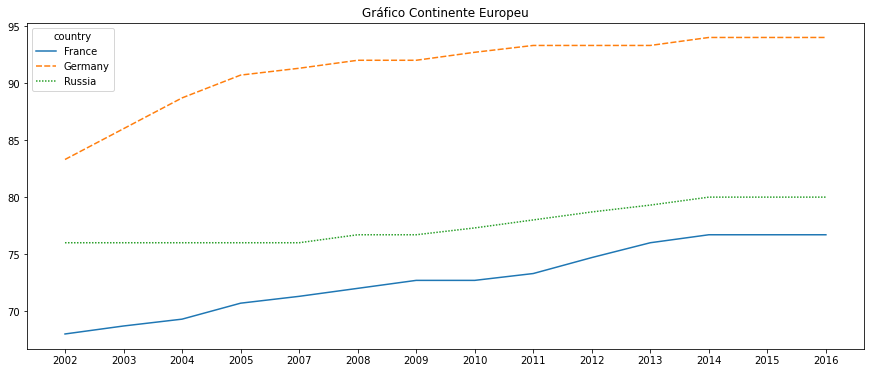

In [302]:
plt.figure(figsize=(15,6),)
sns.lineplot(data=DataEU).set(title="Gráfico Continente Europeu")
plt.show()

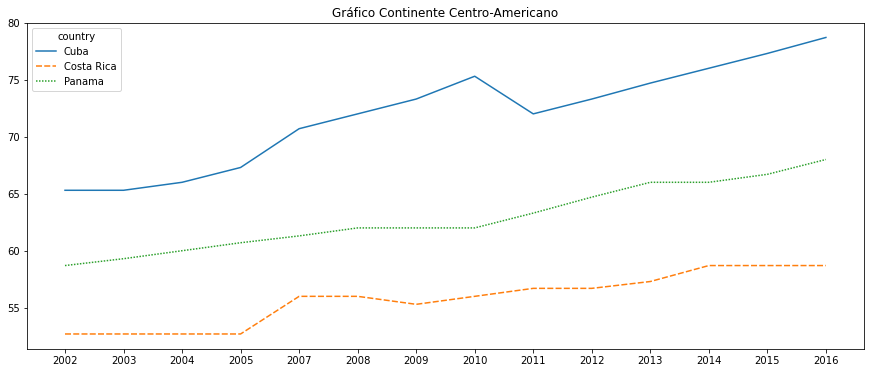

In [301]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DataAC).set(title="Gráfico Continente Centro-Americano")
plt.show()

country
Argentina       63.51
Australia       82.48
Brazil          46.61
Canada          84.09
Chile           65.81
China           48.57
Costa Rica      55.78
Cuba            71.94
Germany         91.33
Egypt           42.90
France          72.82
Indonesia       50.66
India           36.67
Japan           78.71
Mexico          54.22
Nigeria         37.06
New Zealand     80.04
Panama          62.91
Russia          77.62
United States   87.61
South Africa    64.38
dtype: float64


<AxesSubplot:title={'center':'Média de Índice de Educação'}, xlabel='country'>

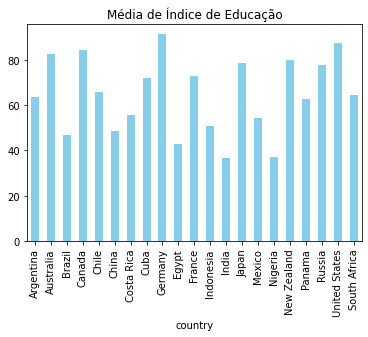

In [297]:
DataMed = df.mean()
print(DataMed)

df.mean().plot.bar(title="Média de Índice de Educação",color="skyblue")